In [55]:
import pandas as pd

### Load results 

In [56]:
result_folder = '../scripts/output/CodeBERTa-small-v1/'
file_name = 'huggingface-CodeBERTa-small-v1_10000_75.0_3.csv'

In [57]:
result_dataframe = pd.read_csv(result_folder + file_name, index_col=0)

In [58]:
result_dataframe.head()

,ast_element,occurences,jaccard,sorensen_dice,levenshtein,jaccard_avg,sorensen_dice_avg,levenshtein_avg
192,identifier,29185,"((1.0, 1.0, 0.9518072289156626, 0.965517241379...","((1.0, 1.0, 0.9753086419753086, 0.982456140350...","((1.0, 1.0, 0.9753086419753086, 0.965517241379...","(0.888, 0.842, 0.817)","(0.938, 0.908, 0.893)","(0.878, 0.832, 0.803)"
88,"""",7608,"((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","(0.99, 0.885, 0.669)","(0.993, 0.917, 0.766)","(0.989, 0.884, 0.667)"
45,(,6905,"((0.8441558441558441, 1.0, 1.0, 1.0, 1.0, 1.0,...","((0.9154929577464789, 1.0, 1.0, 1.0, 1.0, 1.0,...","((0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0,...","(0.995, 0.908, 0.916)","(0.998, 0.95, 0.954)","(0.995, 0.906, 0.914)"
119,),6905,"((0.9473684210526315, 1.0, 1.0, 1.0, 1.0, 0.98...","((0.972972972972973, 1.0, 1.0, 1.0, 1.0, 0.994...","((0.9473684210526316, 1.0, 1.0, 1.0, 1.0, 0.98...","(0.999, 0.952, 0.951)","(0.999, 0.975, 0.974)","(0.999, 0.949, 0.948)"
12,.,6828,"((1.0, 1.0, 1.0, 0.9464285714285714, 0.9110169...","((1.0, 1.0, 1.0, 0.9724770642201835, 0.9534368...","((1.0, 1.0, 1.0, 0.9464285714285714, 0.9110169...","(0.991, 0.952, 0.934)","(0.995, 0.974, 0.965)","(0.991, 0.951, 0.932)"


### Clean Table

In [59]:
result_dataframe = result_dataframe.drop('jaccard',axis=1)
result_dataframe = result_dataframe.drop('sorensen_dice',axis=1)
result_dataframe = result_dataframe.drop('levenshtein',axis=1)
result_dataframe.head()

,ast_element,occurences,jaccard_avg,sorensen_dice_avg,levenshtein_avg
192,identifier,29185,"(0.888, 0.842, 0.817)","(0.938, 0.908, 0.893)","(0.878, 0.832, 0.803)"
88,"""",7608,"(0.99, 0.885, 0.669)","(0.993, 0.917, 0.766)","(0.989, 0.884, 0.667)"
45,(,6905,"(0.995, 0.908, 0.916)","(0.998, 0.95, 0.954)","(0.995, 0.906, 0.914)"
119,),6905,"(0.999, 0.952, 0.951)","(0.999, 0.975, 0.974)","(0.999, 0.949, 0.948)"
12,.,6828,"(0.991, 0.952, 0.934)","(0.995, 0.974, 0.965)","(0.991, 0.951, 0.932)"


In [60]:
def get_k_prediction_values(dataframe, k):
    top_ocurrences_top_k_prediction = dataframe.copy()
    top_ocurrences_top_k_prediction['jaccard_avg'] = top_ocurrences_top_k_prediction['jaccard_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    top_ocurrences_top_k_prediction['sorensen_dice_avg'] = top_ocurrences_top_k_prediction['sorensen_dice_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    top_ocurrences_top_k_prediction['levenshtein_avg'] = top_ocurrences_top_k_prediction['levenshtein_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    return top_ocurrences_top_k_prediction

### Top Ocurrences

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-1'}, xlabel='ast_element'>

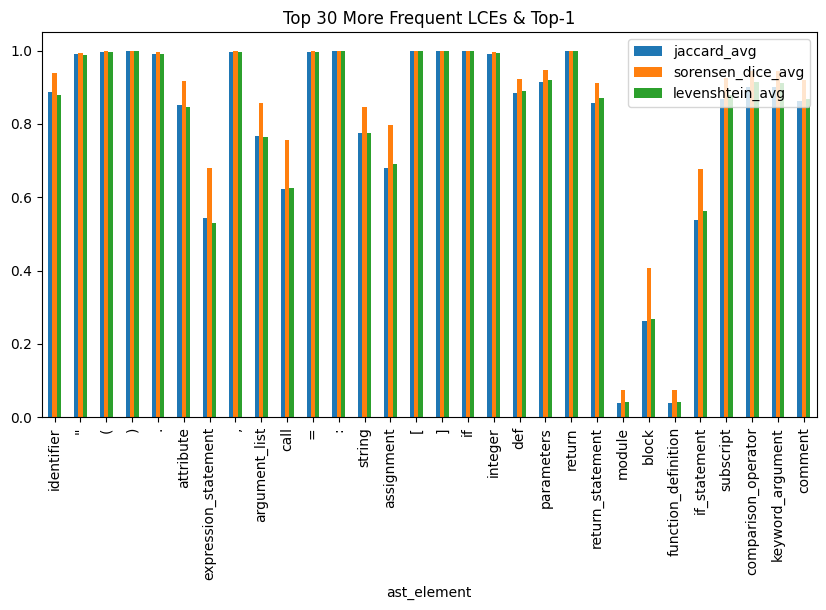

In [61]:
top_1_predictions = get_k_prediction_values(result_dataframe, 1)
top_1_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-1', figsize=(10,5))

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-2'}, xlabel='ast_element'>

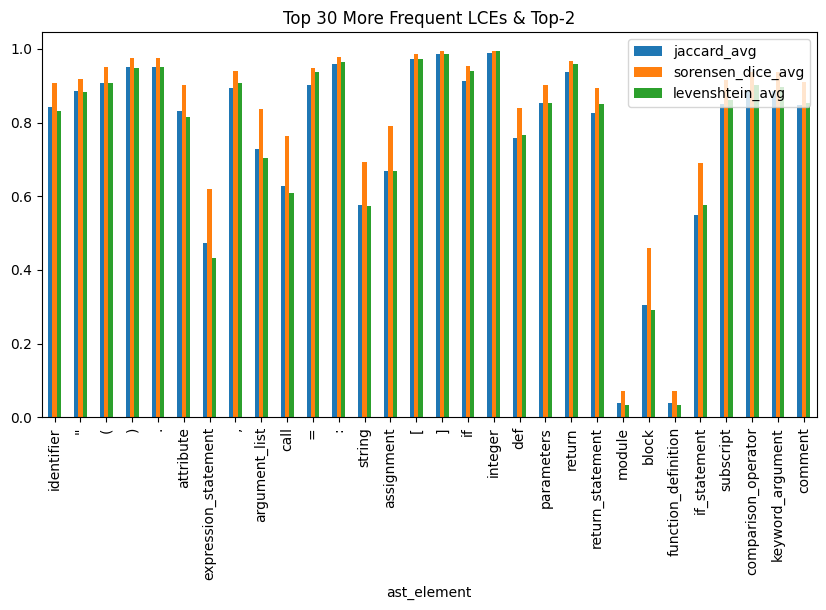

In [62]:
top_2_predictions = get_k_prediction_values(result_dataframe, 2)
top_2_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-2', figsize=(10,5))

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-3'}, xlabel='ast_element'>

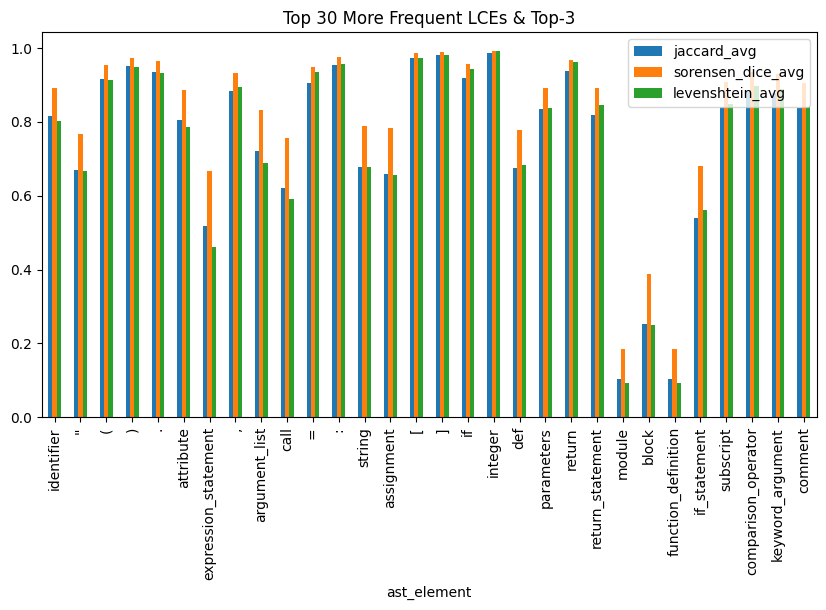

In [63]:
top_3_predictions = get_k_prediction_values(result_dataframe, 3)
top_3_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-3', figsize=(10,5))

### Most Similar Predictions

<AxesSubplot: title={'center': 'Top 30 Less Accurate predictions & Top-1'}, xlabel='ast_element'>

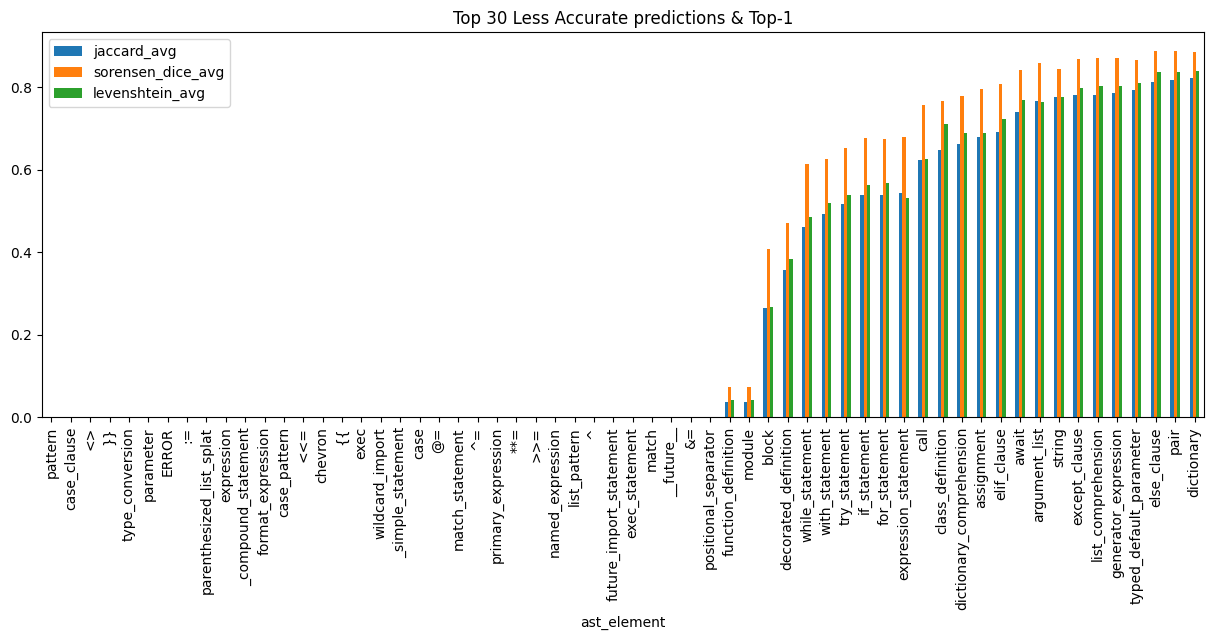

In [64]:
top_1_predictions = get_k_prediction_values(result_dataframe, 1)
top_1_predictions = top_1_predictions.sort_values(by=['jaccard_avg'], ascending=True)
top_1_predictions[:60].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 Less Accurate predictions & Top-1', figsize=(15,5))

<AxesSubplot: title={'center': 'Top 30 Less Accurate predictions & Top-2'}, xlabel='ast_element'>

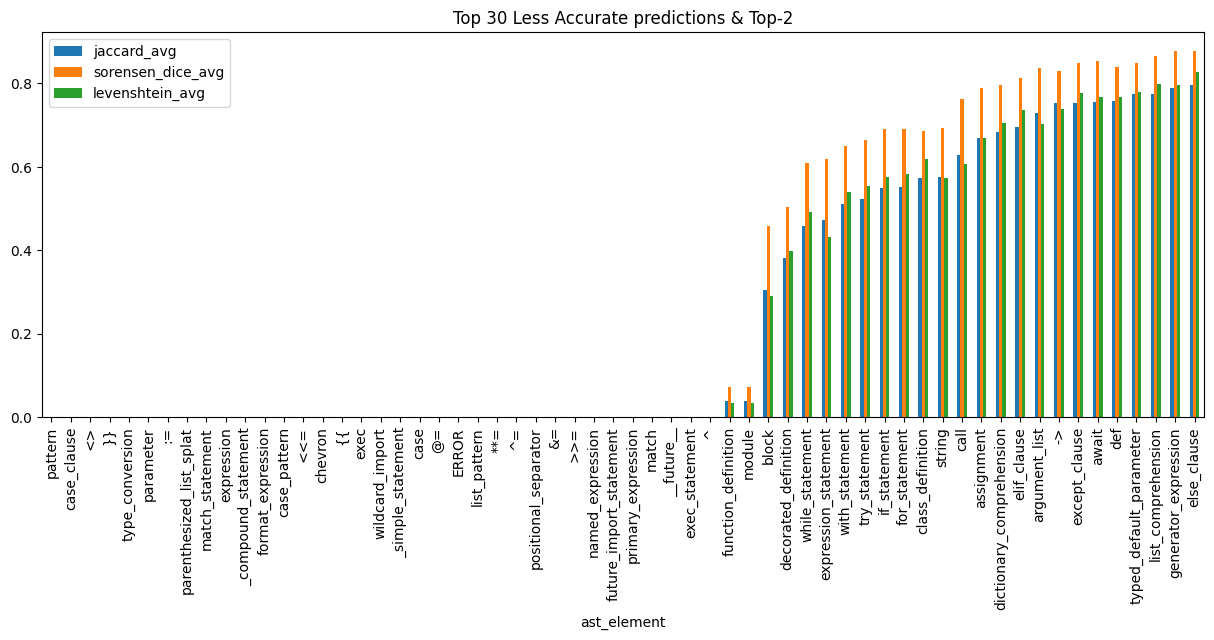

In [66]:
top_2_predictions = get_k_prediction_values(result_dataframe, 2)
top_2_predictions = top_2_predictions.sort_values(by=['jaccard_avg'], ascending=True)
top_2_predictions[:60].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 Less Accurate predictions & Top-2', figsize=(15,5))